## Setting up your environment

Before we begin writing code, we need to add some dependencies to your `bios512` environment. Specifically, we need to install the:
1. [gganimate](https://gganimate.com/),
2. [gifski](https://ropensci.org/blog/2018/07/23/gifski-release/), and,
3. [gapminder](https://cran.r-project.org/web/packages/gapminder/readme/README.html) packages.

We can use `mamba` in a terminal to install these packages. From your launcher menu, select the terminal appilcation and run the command below.

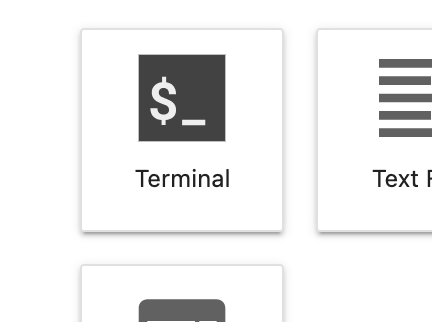

```sh

# run this command from your terminal prompt

mamba install -c conda-forge -n bios512 r-gapminder r-gifski r-gganimate

```

## Load libraries

Now you can load the libraries we'll use in this lecture.

In [ ]:
# 🏃🏽‍♀️ run me! 

library('tidyverse')
library('gganimate')
library('palmerpenguins')
library('gapminder')

## Function for displaying `GIFs`

The last bit of set-up is to make a function that will display our animations in notebooks. Run the cell below ⬇️ to create a function called `display_gif` that we will use later.

In [ ]:
# 🏃🏽‍♀️ run me! 

display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ..., renderer = gifski_renderer()))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

## Iris example

Let's start by creating an example figure using the `iris` data set.

In [ ]:
# 🏃🏽‍♀️ run me! 

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 250)

ggplot(iris, aes(x = Petal.Width, y = Petal.Length, colour = Species)) + 
    geom_point(size = 4, alpha = 0.75) +
    scale_color_brewer(palette = 'Set2')

⬆️ Above is a static chart. It displays all three species in the data set simultaneously. We can transform this into a dynamic visualization by adding one layer to the chart. ♩Note the new layer: `transition_states`. What happens if you change the `transition_length` and `state_length` values?

In [ ]:
# 🏃🏽‍♀️ run me! 

anim = ggplot(iris, aes(x = Petal.Width, y = Petal.Length, colour = Species)) + 
    geom_point(size = 4, alpha = 0.75) +
    scale_color_brewer(palette = 'Set2') +
    ggtitle('Now showing {closest_state}') +
    transition_states(Species, transition_length = 1, state_length = 1) # ⬅ This is the new layer

display_gif(anim, width = 5, height = 3, units = 'in', res = 250)

We can further refine out how our chart changes using `enter_` and `exit_` layers. ⬇️ Below I make my points enter by growing and leave by shrinking.

In [ ]:
# 🏃🏽‍♀️ run me! 

anim = ggplot(iris, aes(x = Petal.Width, y = Petal.Length, colour = Species)) + 
    geom_point(size = 4, alpha = 0.75) +
    scale_color_brewer(palette = 'Set2') +
    ggtitle('Now showing {closest_state}') +
    transition_states(Species, transition_length = 2, state_length = 1) + 
    enter_grow() + 
    exit_shrink()

display_gif(anim, width = 5, height = 3, units = 'in', res = 250)

👀 **[This cheat sheet](https://rstudio.github.io/cheatsheets/gganimate.pdf) is helpful for understanding how gganimate works!**

## Tweening

We can use a technique called "tweening" to move individuals in our chart between data states. Let's make a histogram of `bill_length_mm` and `bill_depth_mm` from our 🐧 Palmer Penguins dataset with a rug.

In [ ]:
# 🏃🏽‍♀️ run me! 

penguins |> head()

First we need to reshape our data to make is suitable for the chart we want. I'm using the `pivot_longer` function below. Can you see the difference? 🔎

In [ ]:
# 🏃🏽‍♀️ run me! 

penguins2 = penguins |> 
    mutate(penguin_id = row_number()) |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm)) |>
    select(species, name, value, penguin_id)

penguins2 |> head()

And this is a static histogram.

In [ ]:
# 🏃🏽‍♀️ run me! 

options(repr.plot.width = 6, repr.plot.height = 4)

p = ggplot(penguins2, aes(x = value, fill = name, color = name)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = penguin_id)) +
    geom_rug(mapping = aes(group = penguin_id), data = penguins2 |> filter(penguin_id == 1), color = 'firebrick', size = 1)

p

But let's *tranistion* from `bill_length_mm` to `bill_depth_mm` instead. Just like the chart above, we define the `transition_state`. The first argument for the `transition_state` layer is the column that defines the "states" of our data. These are the groups in our data that we are transitioning between. Next we decide how we want elements to enter/exit. 

**Because we are also defining a `group` encoding for the "rug," our rug ticks "tween" between the two states insted of entering/exiting. We can track individual penguin bill depths and lengths.** 


**The bright red tick 🟥 shows the first penguin in our data set 🐧🐧🐧🐧!**

**We can also add a title that shows the label for the current group being displayed. `{closesst_state}` in the `ggtitle` layer refers to `bill_depth_mm` or `bill_length_mm` depending on which data is currently displayed.** 

In [ ]:
# 🏃🏽‍♀️ run me!

anim = ggplot(penguins2, aes(x = value, fill = name, color = name)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = penguin_id)) +
    geom_rug(mapping = aes(group = penguin_id), data = penguins2 |> filter(penguin_id == 1), color = 'firebrick', size = 1) +
    transition_states(name) +      # 🆕
    exit_shrink() + enter_grow() + # 🆕
    ggtitle('{closest_state}')     # 🆕

display_gif(anim, width = 5, height = 3.5, units = 'in', res = 250)

## Bar chart race

Adapted from excellent example here: [https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html](https://evamaerey.github.io/little_flipbooks_library/racing_bars/racing_barcharts.html)

This is a more complicated example. We are going to make a [bar chart race visualization](https://observablehq.com/@mbostock/bar-chart-race-with-scrubber) of country population in the [Gapminder](https://www.gapminder.org/) dataset. 

The transition "states" of our data will be based on the `year` column. The cell below set up our data.

In [ ]:
# 🏃🏽‍♀️ run me!

ranked_countries = gapminder |>
  select(country, pop, year, continent) |>  
  group_by(year) |>  
  arrange(year, -pop) |>  
  mutate(rank = row_number(), date = parse_date_time(year, '%Y')) |>  
  filter(rank <= 10)

ranked_countries |> head()

### Make a bar chart for one year with `geom_col`

Filter one a year from our data set and with that year's data make a bar chart 📊
of population by country.

In [ ]:
# Add bar chart code here




### Make a bar chart for one year with `geom_rect`

For our bar chart race viz, we need to make a different kind of bar chart where we explicitly define the y-position of each bar and corresponding country name. See the example below. Can you make sense of this code? 

Use comments to turn on/off the `geom_text` layers. What do these layers do?

In [ ]:
# 🏃🏽‍♀️ run me!

ranked_countries |> filter(year == 1957) |>
ggplot(aes(xmin = 0,  
                  xmax = pop / 1000000,
                  ymin = rank - .45,  
                  ymax = rank + .45,
                  y = rank,
                  fill = continent,
                  group = country)) +  
    geom_rect(alpha = .7) +  
    geom_text(col = "gray13",  
              hjust = "right",  
              aes(label = country), 
              size = 3,
              x = -50) + 
    geom_text(x = 1000 , y = -9.5,  
              family = "Courier",  
              aes(label = as.character(year)),  
              size = 10, col = "grey40") +
    scale_fill_brewer(palette = "Dark2") +   
    scale_y_reverse() +  
    scale_x_continuous(limits = c(-600, 1400), breaks = c(250, 500, 750, 1000, 1250), 
                       labels = scales::label_comma(suffix = 'M')) +  
    labs(x = 'Population', y = '', fill = 'Continent') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(), axis.text.x = element_text(size = 8))


With one line of code, we can turn this static chart into a dynamic visualization! See the `transition_`, and `ender_`/`exit_` layers below... 

**Play around with the `fps` (frames per second) and `nframes` arguments to `display_gif`. What do these arguments control?**

In [ ]:
anim = ggplot(ranked_countries,  
              aes(xmin = 0,  
                  xmax = pop / 1000000,
                  ymin = rank - .45,  
                  ymax = rank + .45,
                  y = rank,
                  fill = continent,
                  group = country)) +  
    geom_rect(alpha = .7) +  
    geom_text(col = "gray13",  
              hjust = "right",  
              aes(label = country), 
              size = 3,
              x = -50) + 
    geom_text(x = 1000 , y = -9.5,  
              family = "courier",  
              aes(label = as.character(year)),  
              size = 10, col = "grey40") +
    scale_fill_brewer(palette = "Dark2") +   
    scale_y_reverse() +  
    scale_x_continuous(limits = c(-600, 1400), breaks = c(250, 500, 750, 1000, 1250), labels = scales::label_comma(suffix = 'M')) +  
    labs(x = 'Population', y = '', fill = 'Continent') +  
    theme_minimal() +
    theme(legend.text = element_text(size = 10), legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(), axis.text.x = element_text(size = 8)) +
    transition_states(date) + enter_fade() + exit_fade() # 🆕 this is all we need to add 🆒
    
display_gif(anim, height = 3.5, width = 6, units = 'in', res = 250, nframes = 300, fps = 20)